#Breath First Search Algorithm implementation from scratch (6)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/DS Grad School/DS8009 Graph Mining/Assign2/')

In [0]:
import networkx as nx
import matplotlib.pyplot as plt


In [0]:
G = nx.read_edgelist('karate.edgelist', edgetype=int, create_using=nx.DiGraph())

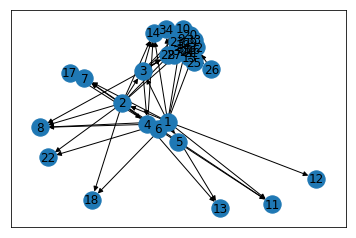

In [0]:
nx.draw_networkx(G) #just so I can have an idea of how the graph looks like

In [0]:
#Set Edges as a list for me to use, only portion that used package to read the data
Edges = list(G.edges())
Edges

[('1', '32'),
 ('1', '2'),
 ('1', '3'),
 ('1', '4'),
 ('1', '5'),
 ('1', '6'),
 ('1', '7'),
 ('1', '8'),
 ('1', '9'),
 ('1', '11'),
 ('1', '12'),
 ('1', '13'),
 ('1', '14'),
 ('1', '18'),
 ('1', '20'),
 ('1', '22'),
 ('32', '34'),
 ('32', '33'),
 ('2', '3'),
 ('2', '4'),
 ('2', '8'),
 ('2', '14'),
 ('2', '18'),
 ('2', '20'),
 ('2', '22'),
 ('2', '31'),
 ('3', '4'),
 ('3', '33'),
 ('3', '8'),
 ('3', '9'),
 ('3', '10'),
 ('3', '14'),
 ('3', '28'),
 ('3', '29'),
 ('4', '8'),
 ('4', '13'),
 ('4', '14'),
 ('5', '11'),
 ('5', '7'),
 ('6', '11'),
 ('6', '17'),
 ('6', '7'),
 ('7', '17'),
 ('9', '34'),
 ('9', '33'),
 ('9', '31'),
 ('14', '34'),
 ('20', '34'),
 ('31', '34'),
 ('31', '33'),
 ('33', '34'),
 ('10', '34'),
 ('28', '34'),
 ('29', '32'),
 ('29', '34'),
 ('15', '33'),
 ('15', '34'),
 ('16', '33'),
 ('16', '34'),
 ('19', '33'),
 ('19', '34'),
 ('21', '33'),
 ('21', '34'),
 ('23', '33'),
 ('23', '34'),
 ('24', '33'),
 ('24', '26'),
 ('24', '28'),
 ('24', '34'),
 ('24', '30'),
 ('26', '32

In [0]:
#checking to see my solutions
bfs_1 = list(list(nx.bfs_edges(G, '1')))
len(bfs_1), len(Edges)

(23, 78)

In [0]:
bfs_1

[('1', '32'),
 ('1', '2'),
 ('1', '3'),
 ('1', '4'),
 ('1', '5'),
 ('1', '6'),
 ('1', '7'),
 ('1', '8'),
 ('1', '9'),
 ('1', '11'),
 ('1', '12'),
 ('1', '13'),
 ('1', '14'),
 ('1', '18'),
 ('1', '20'),
 ('1', '22'),
 ('32', '34'),
 ('32', '33'),
 ('2', '31'),
 ('3', '10'),
 ('3', '28'),
 ('3', '29'),
 ('6', '17')]

In [0]:
#a function to find the neighbours of a node
def neighbour(Edges,x):
  neighbour = []
  for i in Edges:
    if i[0] == x:
      neighbour.append(i[1])
  return neighbour

In [0]:
#A function to remove duplicate from a list
def remove_dup(x):
  return list(dict.fromkeys(x))

In [0]:
#my BFS that i did that prints out all the nodes in the shortest path avail
def bfs(Graph, root):
  traverse = []
  traverse.append(root)
  for i in traverse:
    traverse.extend(neighbour(Graph,i))
  return remove_dup(traverse)


In [0]:
#my BFS traverse all nodes with starting node 1
bfs(Edges,'1')

['1',
 '32',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '11',
 '12',
 '13',
 '14',
 '18',
 '20',
 '22',
 '34',
 '33',
 '31',
 '10',
 '28',
 '29',
 '17']

In [0]:
#using networkx to see solution
bfs_2 = list(list(nx.bfs_edges(G, '2')))
bfs_2

[('2', '3'),
 ('2', '4'),
 ('2', '8'),
 ('2', '14'),
 ('2', '18'),
 ('2', '20'),
 ('2', '22'),
 ('2', '31'),
 ('3', '33'),
 ('3', '9'),
 ('3', '10'),
 ('3', '28'),
 ('3', '29'),
 ('4', '13'),
 ('14', '34'),
 ('29', '32')]

In [0]:
#testing my own with start node 2
bfs(Edges,'2')

['2',
 '3',
 '4',
 '8',
 '14',
 '18',
 '20',
 '22',
 '31',
 '33',
 '9',
 '10',
 '28',
 '29',
 '13',
 '34',
 '32']

#Dijiktra’s Shortest Path implementation from scratch (6)

In [0]:
#set graph as dictionary easier to loop
graph_dict = {}

for x,y in Edges:
  graph_dict.setdefault(x, []).append(y)

graph_dict

{'1': ['32',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '11',
  '12',
  '13',
  '14',
  '18',
  '20',
  '22'],
 '10': ['34'],
 '14': ['34'],
 '15': ['33', '34'],
 '16': ['33', '34'],
 '19': ['33', '34'],
 '2': ['3', '4', '8', '14', '18', '20', '22', '31'],
 '20': ['34'],
 '21': ['33', '34'],
 '23': ['33', '34'],
 '24': ['33', '26', '28', '34', '30'],
 '25': ['32', '26', '28'],
 '26': ['32'],
 '27': ['34', '30'],
 '28': ['34'],
 '29': ['32', '34'],
 '3': ['4', '33', '8', '9', '10', '14', '28', '29'],
 '30': ['33', '34'],
 '31': ['34', '33'],
 '32': ['34', '33'],
 '33': ['34'],
 '4': ['8', '13', '14'],
 '5': ['11', '7'],
 '6': ['11', '17', '7'],
 '7': ['17'],
 '9': ['34', '33', '31']}

In [0]:
#let's see the solution first 
nx.single_source_dijkstra_path(G, '2')

{'10': ['2', '3', '10'],
 '13': ['2', '4', '13'],
 '14': ['2', '14'],
 '18': ['2', '18'],
 '2': ['2'],
 '20': ['2', '20'],
 '22': ['2', '22'],
 '28': ['2', '3', '28'],
 '29': ['2', '3', '29'],
 '3': ['2', '3'],
 '31': ['2', '31'],
 '32': ['2', '3', '29', '32'],
 '33': ['2', '3', '33'],
 '34': ['2', '14', '34'],
 '4': ['2', '4'],
 '8': ['2', '8'],
 '9': ['2', '3', '9']}

In [0]:
#following psuedo code online, a very naive approach.
def dijkstra_path(graph,start, end):
  que = [start]
  dist = {}
  dist[start] = 0
  visited = {}

  for vertex in graph:
    if vertex != start:
      dist[vertex] = 999 #i set a very high value this will be my infinity
      que.append(vertex)

  while end not in visited:
    
    addtoVisited = min(dist, key=dist.get)
    que.remove(addtoVisited) #this removes the minimum value of the distance

    if dist[addtoVisited] == 999: #break the loop once it hits a node that it cannot reach
      break
   
    for vertex in graph[addtoVisited]: #here to the neighbours of node
      if vertex not in dist:
        continue
      alt = dist[addtoVisited] + 1 #1 because we know our graph its unweighted all weights are 1
      if alt < dist[vertex]:
        dist[vertex] = alt
        visited[vertex] = addtoVisited
            
    dist.pop(addtoVisited)

  path = [end]
  while start not in path:
    for key in visited:
      if key == path[-1]:
        path.append(visited[key])

  path = path[::-1]

  return path

In [0]:
#starting at 2 ending at 32
dijkstra_path(graph_dict,'2','32')

['2', '3', '29', '32']

In [0]:
#starting at 2 ending at 33
dijkstra_path(graph_dict,'2','10')

['2', '3', '10']

#(3) How will you Modify (2) to identify the longest paths instead of shortest paths? Just describe in words. 


Rather than changing all distances from starting node to infinity I'll start it with the lowest number possible '0.1' so it differentiates from starting node of 0. Than I will have it loop to choose the larger distance from the node comparison. Hence this will give me the longest path available.